# Abalone

-Predict the age of the abalone according to 8 physical measures

-It is a regression problem

-Data is obtained from https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/

# INSTALLING BOOSTING ALGORITHMS

In [55]:
#installing machine gradient boosting algorithms
#Gradient boosting is a machine learning technique used in regression and classification tasks, among others.
#they are supervised learning algorithms that are mostly used in machine learning to increase the level of accuracy
#in the models. NOTE; you have to be connected to the internet before yoou can install it.


!pip install lightgbm
!pip install catboost
!pip install xgboost
!pip install category_encoders

# LIBRARIES

In [56]:
#this line of code is used for importing the libraries such as visualization and data analysis libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,PolynomialFeatures
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split,KFold
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,BaggingRegressor,VotingRegressor,StackingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from xgboost import XGBRFRegressor,XGBRegressor
from catboost import CatBoostRegressor
from category_encoders import CountEncoder
%matplotlib inline
sns.set()

# IMPORTING DATA

In [57]:
#reading and importing the dataset and from the table below we can see that the dataset has 4,177 rows and 9 columns.

abalone = pd.read_csv('abalone.csv')
abalone

#this code displays the column names , the first 5 rows and the last 5 rows.

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# INFO

In [58]:
#checking the dataset which shows us the dtypes, features and also null values.(there are no missing values)

abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


# Data overview

In [59]:
abalone.describe()

#The describe() function computes a summary of statistics pertaining to the DataFrame columns.
#This function gives the mean, std and IQR(interquartile range) values.
#And, function excludes the character columns and given summary about numeric columns

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [60]:
abalone.columns

#this code returns the column labels of this Dataframe.

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

# MISSING VALUES

In [61]:
#checking for NAN values
#What are NaN values?
#NaN stands for Not A Number and is one of the common ways to check the missing value in the data. 

abalone.isnull().sum()

#After running the code, we notice that this dataset does not have any missing values

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

# DUPLICATES

In [62]:
#checking for duplicated values

abalone.duplicated()

#this method returns a True and False values(boolean) that describe which rows in the DataFrame are duplicated and not.

0       False
1       False
2       False
3       False
4       False
        ...  
4172    False
4173    False
4174    False
4175    False
4176    False
Length: 4177, dtype: bool

In [63]:
abalone.duplicated().sum()

0

In [64]:
#The shape of a DataFrame is a tuple of array dimensions that tells the number of rows and columns of a given DataFrame.

abalone.shape

(4177, 9)

In [65]:
#checking data correlation
#this function returns a pairwise correlation of all columns in the dataframe.
#the NAN values and non-numerical datatype are automatically ignored.

abalone.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


                  Length  Diameter    Height  Whole weight  Shucked weight  \
Length          1.000000  0.986812  0.827554      0.925261        0.897914   
Diameter        0.986812  1.000000  0.833684      0.925452        0.893162   
Height          0.827554  0.833684  1.000000      0.819221        0.774972   
Whole weight    0.925261  0.925452  0.819221      1.000000        0.969405   
Shucked weight  0.897914  0.893162  0.774972      0.969405        1.000000   
Viscera weight  0.903018  0.899724  0.798319      0.966375        0.931961   
Shell weight    0.897706  0.905330  0.817338      0.955355        0.882617   
Rings           0.556720  0.574660  0.557467      0.540390        0.420884   

                Viscera weight  Shell weight     Rings  
Length                0.903018      0.897706  0.556720  
Diameter              0.899724      0.905330  0.574660  
Height                0.798319      0.817338  0.557467  
Whole weight          0.966375      0.955355  0.540390  
Shucked weig

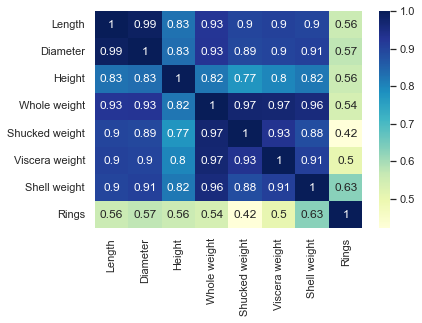

In [66]:
print(abalone.corr())
  
# plotting correlation heatmap
#What can be seen in heatmap?
#Heatmaps are used to show relationships between two variables, one plotted on each axis.
dataplot = sns.heatmap(abalone.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()


#it seems length and diameter are mostly correlated

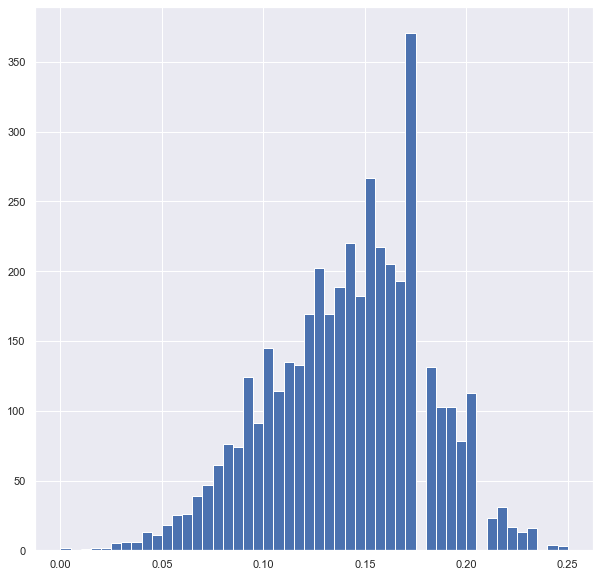

In [68]:
#A histogram is a graph that represents the way numerical data is represented.
#The input to it is a numerical variable, which it separates into bins on the x-axis.

# The attributes in general look fine except Height has outliers which would better to drop
abalone = abalone[abalone["Height"] < 0.5]
abalone["Height"].hist(bins=50, figsize=(10,10))
plt.show()

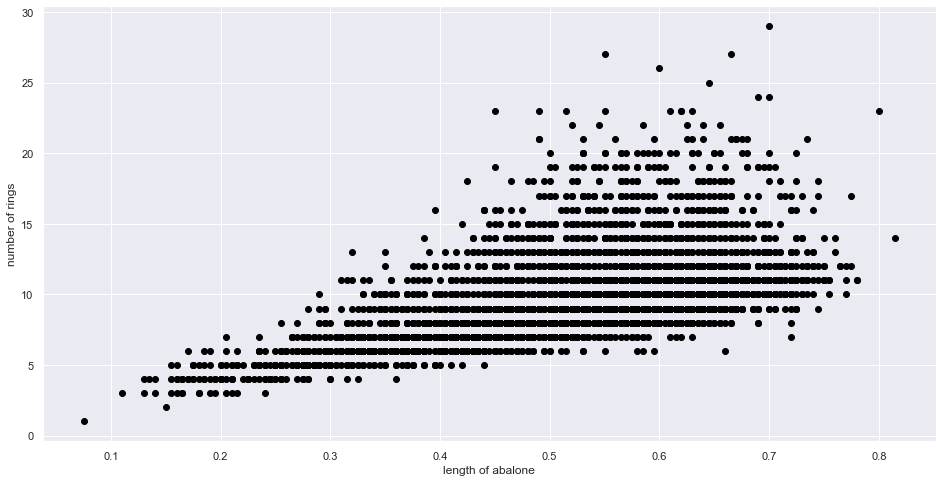

In [69]:
plt.figure(figsize=(16,8))
plt.scatter(abalone['Length'], abalone['Rings'], c='black')
plt.xlabel('length of abalone')
plt.ylabel('number of rings')
plt.show()

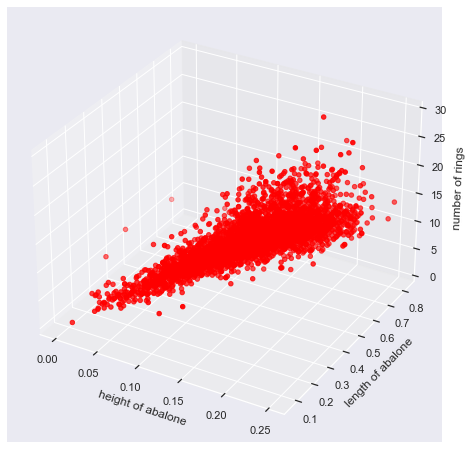

In [70]:
#3D plot

fig = plt.figure(figsize= (16,8))
ax = plt.axes(projection='3d')

ax.set_xlabel('height of abalone')
ax.set_ylabel('length of abalone')
ax.set_zlabel('number of rings')
ax.scatter3D(abalone['Height'], abalone['Length'], abalone['Rings'], c='red')

plt.show()

In [71]:
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [72]:
abalone.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [73]:
#Label encoder for converting the categorical column(sex) to numerical

le=LabelEncoder()
abalone['Sex']=le.fit_transform(abalone['Sex'])

C:\Users\user\AppData\Local\Temp\ipykernel_9448\786886136.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abalone['Sex']=le.fit_transform(abalone['Sex'])


In [74]:
abalone[['Sex']].head()

,Sex
0,2
1,2
2,0
3,2
4,1


In [75]:
abalone['Sex']=abalone['Sex'].astype('float')

C:\Users\user\AppData\Local\Temp\ipykernel_9448\3586264830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abalone['Sex']=abalone['Sex'].astype('float')


In [76]:
#seperating predictors and target values(input&output)

X = abalone.iloc[:, :-1]
y = abalone.iloc[:, -1]

In [77]:
X

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [78]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4175, dtype: int64

In [79]:
#Splitting the dataset into test and train (75% train and 25% test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [80]:
len(X_train), len(y_train)

(3131, 3131)

In [81]:
len(X_test), len(y_test)

(1044, 1044)

In [82]:
X.shape

(4175, 8)

In [83]:
y.shape

(4175,)

In [84]:
#Model setup

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [85]:
y_pred= lr.predict(X_test)

In [86]:
from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred))

0.511606127311418


In [87]:
#checking model performance

r1 = XGBRegressor(random_state = 42)
r2 = RandomForestRegressor(random_state=42)
r3 = CatBoostRegressor(verbose=False,random_state = 42)

In [88]:
model = VotingRegressor([('r1', r1),('rf', r2),('r3',r3)],weights=(1,1,1))
model.fit(X,y)
np.mean(mean_squared_error(y_test,y_pred))

4.638786005862021

In [89]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))


1.5803610495762088


In [90]:
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))


4.638786005862021
2.1537841131046584


In [91]:
lr_pred = lr.predict(X_test)
test_rmse = mean_squared_error(y_test, lr_pred, squared=False)
print(f'test RMSE: {test_rmse}')

test RMSE: 2.1537841131046584


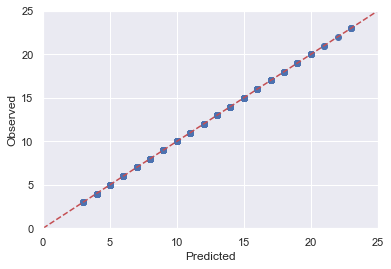

In [92]:
# Plot
plt.scatter(y_test, y_test)
plt.xlim(0,25)
plt.ylim(0,25)
plt.xlabel("Predicted")
plt.ylabel("Observed")

y = [0,25]
plt.plot(y, y, "--r")

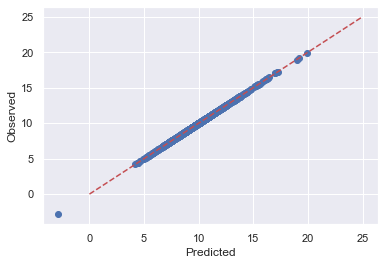

In [93]:
# Plot
plt.scatter(y_pred, y_pred)
#plt.xlim(0,25)
#plt.ylim(0,25)
plt.xlabel("Predicted")
plt.ylabel("Observed")

#y = [0,25]
plt.plot(y, y, "--r")